In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import scipy
import cv2 as cv

/home/uttam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('nepali_characters/*/*/*.jpg'):
    # use the filename to set the correct label
    label = int(image_file_name[-14:-11])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = cv.imread(image_file_name, 0)  #Read an image from a file as an array
    (thresh, image_array) = cv.threshold(img_array, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    # reshape from 28x28 to list of 784 values, invert values
 #   img_data  = (255.0 - img_array.reshape(784))/255.0
    
    # then scale data to range from 0.01 to 1.0
#     img_data = (img_data / 255.0 * 0.99) + 0.01
#     print(np.min(img_data))
#     print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,image_array)
    our_own_dataset.append(record)

loading ...  nepali_characters/02_vowels/013/004_09.jpg
loading ...  nepali_characters/02_vowels/013/016_04.jpg
loading ...  nepali_characters/02_vowels/013/023_01.jpg
loading ...  nepali_characters/02_vowels/013/045_02.jpg
loading ...  nepali_characters/02_vowels/013/044_02.jpg
loading ...  nepali_characters/02_vowels/013/019_02.jpg
loading ...  nepali_characters/02_vowels/013/004_10.jpg
loading ...  nepali_characters/02_vowels/013/030_02.jpg
loading ...  nepali_characters/02_vowels/013/013_03.jpg
loading ...  nepali_characters/02_vowels/013/029_01.jpg
loading ...  nepali_characters/02_vowels/013/001_22.jpg
loading ...  nepali_characters/02_vowels/013/001_03.jpg
loading ...  nepali_characters/02_vowels/013/017_02.jpg
loading ...  nepali_characters/02_vowels/013/018_02.jpg
loading ...  nepali_characters/02_vowels/013/008_03.jpg
loading ...  nepali_characters/02_vowels/013/013_06.jpg
loading ...  nepali_characters/02_vowels/013/019_06.jpg
loading ...  nepali_characters/02_vowels/013/019

loading ...  nepali_characters/02_vowels/019/017_09.jpg
loading ...  nepali_characters/02_vowels/019/034_01.jpg
loading ...  nepali_characters/02_vowels/019/001_11.jpg
loading ...  nepali_characters/02_vowels/019/016_06.jpg
loading ...  nepali_characters/02_vowels/019/011_10.jpg
loading ...  nepali_characters/02_vowels/019/016_01.jpg
loading ...  nepali_characters/02_vowels/019/036_02.jpg
loading ...  nepali_characters/02_vowels/019/046_01.jpg
loading ...  nepali_characters/02_vowels/019/019_08.jpg
loading ...  nepali_characters/02_vowels/019/010_09.jpg
loading ...  nepali_characters/02_vowels/019/013_01.jpg
loading ...  nepali_characters/02_vowels/019/010_06.jpg
loading ...  nepali_characters/02_vowels/019/001_20.jpg
loading ...  nepali_characters/02_vowels/019/008_10.jpg
loading ...  nepali_characters/02_vowels/019/001_17.jpg
loading ...  nepali_characters/02_vowels/019/012_10.jpg
loading ...  nepali_characters/02_vowels/019/011_02.jpg
loading ...  nepali_characters/02_vowels/019/004

loading ...  nepali_characters/02_vowels/010/010_10.jpg
loading ...  nepali_characters/02_vowels/010/007_02.jpg
loading ...  nepali_characters/02_vowels/010/012_02.jpg
loading ...  nepali_characters/02_vowels/010/014_08.jpg
loading ...  nepali_characters/02_vowels/010/043_02.jpg
loading ...  nepali_characters/02_vowels/010/019_01.jpg
loading ...  nepali_characters/02_vowels/010/014_09.jpg
loading ...  nepali_characters/02_vowels/010/032_02.jpg
loading ...  nepali_characters/02_vowels/010/013_10.jpg
loading ...  nepali_characters/02_vowels/010/001_23.jpg
loading ...  nepali_characters/02_vowels/010/007_04.jpg
loading ...  nepali_characters/02_vowels/010/017_08.jpg
loading ...  nepali_characters/02_vowels/010/008_01.jpg
loading ...  nepali_characters/02_vowels/010/011_06.jpg
loading ...  nepali_characters/02_vowels/010/013_05.jpg
loading ...  nepali_characters/02_vowels/010/014_10.jpg
loading ...  nepali_characters/02_vowels/010/004_11.jpg
loading ...  nepali_characters/02_vowels/010/019

loading ...  nepali_characters/02_vowels/016/014_01.jpg
loading ...  nepali_characters/02_vowels/016/035_02.jpg
loading ...  nepali_characters/02_vowels/016/033_02.jpg
loading ...  nepali_characters/02_vowels/016/004_12.jpg
loading ...  nepali_characters/02_vowels/016/034_02.jpg
loading ...  nepali_characters/02_vowels/016/019_07.jpg
loading ...  nepali_characters/02_vowels/016/020_01.jpg
loading ...  nepali_characters/02_vowels/016/011_04.jpg
loading ...  nepali_characters/02_vowels/016/015_03.jpg
loading ...  nepali_characters/02_vowels/016/004_05.jpg
loading ...  nepali_characters/02_vowels/016/018_04.jpg
loading ...  nepali_characters/02_vowels/016/037_02.jpg
loading ...  nepali_characters/02_vowels/016/006_03.jpg
loading ...  nepali_characters/02_vowels/016/028_01.jpg
loading ...  nepali_characters/02_vowels/016/020_08.jpg
loading ...  nepali_characters/02_vowels/016/020_06.jpg
loading ...  nepali_characters/02_vowels/016/012_03.jpg
loading ...  nepali_characters/02_vowels/016/018

loading ...  nepali_characters/01_numerals/008/030_03.jpg
loading ...  nepali_characters/01_numerals/008/001_06.jpg
loading ...  nepali_characters/01_numerals/008/017_07.jpg
loading ...  nepali_characters/01_numerals/008/010_02.jpg
loading ...  nepali_characters/01_numerals/008/021_10.jpg
loading ...  nepali_characters/01_numerals/008/002_11.jpg
loading ...  nepali_characters/01_numerals/008/005_03.jpg
loading ...  nepali_characters/01_numerals/008/012_08.jpg
loading ...  nepali_characters/01_numerals/008/020_07.jpg
loading ...  nepali_characters/01_numerals/008/001_09.jpg
loading ...  nepali_characters/01_numerals/008/044_01.jpg
loading ...  nepali_characters/01_numerals/008/041_02.jpg
loading ...  nepali_characters/01_numerals/008/014_01.jpg
loading ...  nepali_characters/01_numerals/008/035_02.jpg
loading ...  nepali_characters/01_numerals/008/033_02.jpg
loading ...  nepali_characters/01_numerals/008/004_12.jpg
loading ...  nepali_characters/01_numerals/008/034_02.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/007/025_01.jpg
loading ...  nepali_characters/01_numerals/007/021_09.jpg
loading ...  nepali_characters/01_numerals/007/024_02.jpg
loading ...  nepali_characters/01_numerals/007/040_01.jpg
loading ...  nepali_characters/01_numerals/007/035_01.jpg
loading ...  nepali_characters/01_numerals/007/022_07.jpg
loading ...  nepali_characters/01_numerals/007/001_12.jpg
loading ...  nepali_characters/01_numerals/007/018_03.jpg
loading ...  nepali_characters/01_numerals/007/013_04.jpg
loading ...  nepali_characters/01_numerals/007/041_01.jpg
loading ...  nepali_characters/01_numerals/007/001_24.jpg
loading ...  nepali_characters/01_numerals/007/014_03.jpg
loading ...  nepali_characters/01_numerals/007/014_07.jpg
loading ...  nepali_characters/01_numerals/007/045_01.jpg
loading ...  nepali_characters/01_numerals/007/001_01.jpg
loading ...  nepali_characters/01_numerals/007/001_21.jpg
loading ...  nepali_characters/01_numerals/007/043_01.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/004/001_02.jpg
loading ...  nepali_characters/01_numerals/004/018_01.jpg
loading ...  nepali_characters/01_numerals/004/010_05.jpg
loading ...  nepali_characters/01_numerals/004/002_09.jpg
loading ...  nepali_characters/01_numerals/004/016_02.jpg
loading ...  nepali_characters/01_numerals/004/007_05.jpg
loading ...  nepali_characters/01_numerals/004/012_17.jpg
loading ...  nepali_characters/01_numerals/004/019_05.jpg
loading ...  nepali_characters/01_numerals/004/022_05.jpg
loading ...  nepali_characters/01_numerals/004/006_01.jpg
loading ...  nepali_characters/01_numerals/004/001_15.jpg
loading ...  nepali_characters/01_numerals/004/001_16.jpg
loading ...  nepali_characters/01_numerals/004/007_10.jpg
loading ...  nepali_characters/01_numerals/004/022_01.jpg
loading ...  nepali_characters/01_numerals/004/017_10.jpg
loading ...  nepali_characters/01_numerals/004/013_09.jpg
loading ...  nepali_characters/01_numerals/004/001_05.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/000/030_04.jpg
loading ...  nepali_characters/01_numerals/000/006_02.jpg
loading ...  nepali_characters/01_numerals/000/011_05.jpg
loading ...  nepali_characters/01_numerals/000/006_09.jpg
loading ...  nepali_characters/01_numerals/000/016_10.jpg
loading ...  nepali_characters/01_numerals/000/040_02.jpg
loading ...  nepali_characters/01_numerals/000/038_02.jpg
loading ...  nepali_characters/01_numerals/000/001_10.jpg
loading ...  nepali_characters/01_numerals/000/001_04.jpg
loading ...  nepali_characters/01_numerals/000/015_04.jpg
loading ...  nepali_characters/01_numerals/000/005_04.jpg
loading ...  nepali_characters/01_numerals/000/017_04.jpg
loading ...  nepali_characters/01_numerals/000/023_02.jpg
loading ...  nepali_characters/01_numerals/000/007_08.jpg
loading ...  nepali_characters/01_numerals/000/025_02.jpg
loading ...  nepali_characters/01_numerals/000/005_01.jpg
loading ...  nepali_characters/01_numerals/000/001_18.jpg
loading ...  n

loading ...  nepali_characters/03_consonants/042/037_02.jpg
loading ...  nepali_characters/03_consonants/042/006_03.jpg
loading ...  nepali_characters/03_consonants/042/028_01.jpg
loading ...  nepali_characters/03_consonants/042/020_08.jpg
loading ...  nepali_characters/03_consonants/042/047_06.jpg
loading ...  nepali_characters/03_consonants/042/020_06.jpg
loading ...  nepali_characters/03_consonants/042/012_03.jpg
loading ...  nepali_characters/03_consonants/042/018_09.jpg
loading ...  nepali_characters/03_consonants/042/011_07.jpg
loading ...  nepali_characters/03_consonants/042/007_03.jpg
loading ...  nepali_characters/03_consonants/042/004_04.jpg
loading ...  nepali_characters/03_consonants/042/018_10.jpg
loading ...  nepali_characters/03_consonants/042/002_06.jpg
loading ...  nepali_characters/03_consonants/042/010_08.jpg
loading ...  nepali_characters/03_consonants/042/012_04.jpg
loading ...  nepali_characters/03_consonants/042/017_06.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/055/041_01.jpg
loading ...  nepali_characters/03_consonants/055/047_07.jpg
loading ...  nepali_characters/03_consonants/055/014_03.jpg
loading ...  nepali_characters/03_consonants/055/014_07.jpg
loading ...  nepali_characters/03_consonants/055/047_03.jpg
loading ...  nepali_characters/03_consonants/055/045_01.jpg
loading ...  nepali_characters/03_consonants/055/001_01.jpg
loading ...  nepali_characters/03_consonants/055/043_01.jpg
loading ...  nepali_characters/03_consonants/055/002_04.jpg
loading ...  nepali_characters/03_consonants/055/001_13.jpg
loading ...  nepali_characters/03_consonants/055/018_06.jpg
loading ...  nepali_characters/03_consonants/055/002_03.jpg
loading ...  nepali_characters/03_consonants/055/008_05.jpg
loading ...  nepali_characters/03_consonants/055/007_01.jpg
loading ...  nepali_characters/03_consonants/055/028_02.jpg
loading ...  nepali_characters/03_consonants/055/002_13.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/022/011_06.jpg
loading ...  nepali_characters/03_consonants/022/013_05.jpg
loading ...  nepali_characters/03_consonants/022/014_10.jpg
loading ...  nepali_characters/03_consonants/022/004_11.jpg
loading ...  nepali_characters/03_consonants/022/012_06.jpg
loading ...  nepali_characters/03_consonants/022/004_07.jpg
loading ...  nepali_characters/03_consonants/022/004_06.jpg
loading ...  nepali_characters/03_consonants/022/008_02.jpg
loading ...  nepali_characters/03_consonants/022/015_06.jpg
loading ...  nepali_characters/03_consonants/022/047_02.jpg
loading ...  nepali_characters/03_consonants/022/014_04.jpg
loading ...  nepali_characters/03_consonants/022/013_02.jpg
loading ...  nepali_characters/03_consonants/022/015_01.jpg
loading ...  nepali_characters/03_consonants/022/016_03.jpg
loading ...  nepali_characters/03_consonants/022/015_07.jpg
loading ...  nepali_characters/03_consonants/022/015_10.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/038/008_01.jpg
loading ...  nepali_characters/03_consonants/038/011_06.jpg
loading ...  nepali_characters/03_consonants/038/013_05.jpg
loading ...  nepali_characters/03_consonants/038/014_10.jpg
loading ...  nepali_characters/03_consonants/038/004_11.jpg
loading ...  nepali_characters/03_consonants/038/012_06.jpg
loading ...  nepali_characters/03_consonants/038/004_07.jpg
loading ...  nepali_characters/03_consonants/038/004_06.jpg
loading ...  nepali_characters/03_consonants/038/008_02.jpg
loading ...  nepali_characters/03_consonants/038/015_06.jpg
loading ...  nepali_characters/03_consonants/038/047_02.jpg
loading ...  nepali_characters/03_consonants/038/014_04.jpg
loading ...  nepali_characters/03_consonants/038/013_02.jpg
loading ...  nepali_characters/03_consonants/038/015_01.jpg
loading ...  nepali_characters/03_consonants/038/016_03.jpg
loading ...  nepali_characters/03_consonants/038/015_07.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/046/015_10.jpg
loading ...  nepali_characters/03_consonants/046/020_02.jpg
loading ...  nepali_characters/03_consonants/046/017_01.jpg
loading ...  nepali_characters/03_consonants/046/015_02.jpg
loading ...  nepali_characters/03_consonants/046/020_09.jpg
loading ...  nepali_characters/03_consonants/046/005_02.jpg
loading ...  nepali_characters/03_consonants/046/012_05.jpg
loading ...  nepali_characters/03_consonants/046/018_07.jpg
loading ...  nepali_characters/03_consonants/029/004_09.jpg
loading ...  nepali_characters/03_consonants/029/016_04.jpg
loading ...  nepali_characters/03_consonants/029/023_01.jpg
loading ...  nepali_characters/03_consonants/029/045_02.jpg
loading ...  nepali_characters/03_consonants/029/044_02.jpg
loading ...  nepali_characters/03_consonants/029/019_02.jpg
loading ...  nepali_characters/03_consonants/029/004_10.jpg
loading ...  nepali_characters/03_consonants/029/030_02.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/043/002_12.jpg
loading ...  nepali_characters/03_consonants/043/027_02.jpg
loading ...  nepali_characters/03_consonants/043/010_03.jpg
loading ...  nepali_characters/03_consonants/043/001_14.jpg
loading ...  nepali_characters/03_consonants/043/004_01.jpg
loading ...  nepali_characters/03_consonants/043/002_08.jpg
loading ...  nepali_characters/03_consonants/043/006_05.jpg
loading ...  nepali_characters/03_consonants/043/011_01.jpg
loading ...  nepali_characters/03_consonants/043/036_01.jpg
loading ...  nepali_characters/03_consonants/043/011_03.jpg
loading ...  nepali_characters/03_consonants/043/001_07.jpg
loading ...  nepali_characters/03_consonants/043/047_04.jpg
loading ...  nepali_characters/03_consonants/043/013_07.jpg
loading ...  nepali_characters/03_consonants/043/014_02.jpg
loading ...  nepali_characters/03_consonants/043/042_02.jpg
loading ...  nepali_characters/03_consonants/043/014_06.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/037/019_05.jpg
loading ...  nepali_characters/03_consonants/037/006_01.jpg
loading ...  nepali_characters/03_consonants/037/001_15.jpg
loading ...  nepali_characters/03_consonants/037/001_16.jpg
loading ...  nepali_characters/03_consonants/037/022_01.jpg
loading ...  nepali_characters/03_consonants/037/017_10.jpg
loading ...  nepali_characters/03_consonants/037/001_05.jpg
loading ...  nepali_characters/03_consonants/037/037_01.jpg
loading ...  nepali_characters/03_consonants/037/020_10.jpg
loading ...  nepali_characters/03_consonants/037/027_01.jpg
loading ...  nepali_characters/03_consonants/037/002_10.jpg
loading ...  nepali_characters/03_consonants/037/018_05.jpg
loading ...  nepali_characters/03_consonants/037/022_02.jpg
loading ...  nepali_characters/03_consonants/037/006_04.jpg
loading ...  nepali_characters/03_consonants/037/019_04.jpg
loading ...  nepali_characters/03_consonants/037/030_03.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/039/007_04.jpg
loading ...  nepali_characters/03_consonants/039/017_08.jpg
loading ...  nepali_characters/03_consonants/039/008_01.jpg
loading ...  nepali_characters/03_consonants/039/011_06.jpg
loading ...  nepali_characters/03_consonants/039/013_05.jpg
loading ...  nepali_characters/03_consonants/039/014_10.jpg
loading ...  nepali_characters/03_consonants/039/004_11.jpg
loading ...  nepali_characters/03_consonants/039/012_06.jpg
loading ...  nepali_characters/03_consonants/039/004_07.jpg
loading ...  nepali_characters/03_consonants/039/004_06.jpg
loading ...  nepali_characters/03_consonants/039/008_02.jpg
loading ...  nepali_characters/03_consonants/039/015_06.jpg
loading ...  nepali_characters/03_consonants/039/047_02.jpg
loading ...  nepali_characters/03_consonants/039/014_04.jpg
loading ...  nepali_characters/03_consonants/039/013_02.jpg
loading ...  nepali_characters/03_consonants/039/015_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/036/006_04.jpg
loading ...  nepali_characters/03_consonants/036/019_04.jpg
loading ...  nepali_characters/03_consonants/036/030_03.jpg
loading ...  nepali_characters/03_consonants/036/001_06.jpg
loading ...  nepali_characters/03_consonants/036/017_07.jpg
loading ...  nepali_characters/03_consonants/036/010_02.jpg
loading ...  nepali_characters/03_consonants/036/002_11.jpg
loading ...  nepali_characters/03_consonants/036/005_03.jpg
loading ...  nepali_characters/03_consonants/036/020_07.jpg
loading ...  nepali_characters/03_consonants/036/001_09.jpg
loading ...  nepali_characters/03_consonants/036/044_01.jpg
loading ...  nepali_characters/03_consonants/036/041_02.jpg
loading ...  nepali_characters/03_consonants/036/014_01.jpg
loading ...  nepali_characters/03_consonants/036/035_02.jpg
loading ...  nepali_characters/03_consonants/036/033_02.jpg
loading ...  nepali_characters/03_consonants/036/034_02.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/026/015_02.jpg
loading ...  nepali_characters/03_consonants/026/020_09.jpg
loading ...  nepali_characters/03_consonants/026/005_02.jpg
loading ...  nepali_characters/03_consonants/026/012_05.jpg
loading ...  nepali_characters/03_consonants/026/018_07.jpg
loading ...  nepali_characters/03_consonants/035/004_09.jpg
loading ...  nepali_characters/03_consonants/035/016_04.jpg
loading ...  nepali_characters/03_consonants/035/023_01.jpg
loading ...  nepali_characters/03_consonants/035/045_02.jpg
loading ...  nepali_characters/03_consonants/035/044_02.jpg
loading ...  nepali_characters/03_consonants/035/019_02.jpg
loading ...  nepali_characters/03_consonants/035/004_10.jpg
loading ...  nepali_characters/03_consonants/035/030_02.jpg
loading ...  nepali_characters/03_consonants/035/013_03.jpg
loading ...  nepali_characters/03_consonants/035/029_01.jpg
loading ...  nepali_characters/03_consonants/035/001_03.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/056/023_01.jpg
loading ...  nepali_characters/03_consonants/056/045_02.jpg
loading ...  nepali_characters/03_consonants/056/044_02.jpg
loading ...  nepali_characters/03_consonants/056/019_02.jpg
loading ...  nepali_characters/03_consonants/056/004_10.jpg
loading ...  nepali_characters/03_consonants/056/030_02.jpg
loading ...  nepali_characters/03_consonants/056/013_03.jpg
loading ...  nepali_characters/03_consonants/056/029_01.jpg
loading ...  nepali_characters/03_consonants/056/001_03.jpg
loading ...  nepali_characters/03_consonants/056/002_07.jpg
loading ...  nepali_characters/03_consonants/056/017_02.jpg
loading ...  nepali_characters/03_consonants/056/018_02.jpg
loading ...  nepali_characters/03_consonants/056/008_03.jpg
loading ...  nepali_characters/03_consonants/056/013_06.jpg
loading ...  nepali_characters/03_consonants/056/019_03.jpg
loading ...  nepali_characters/03_consonants/056/011_08.jpg
loading ...  nepali_characters/03_conson

In [3]:
data = np.array(our_own_dataset)
np.random.shuffle(data)
xx = pd.DataFrame(data)

In [4]:
xx.tail()

,0,1,2,3,4,5,6,7,8,9,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
12907,47,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12908,55,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12909,55,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12910,14,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12911,37,255,255,255,255,0,0,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [5]:
x = np.array(xx)
X = x[:,1:]
y = x[:,0]

In [6]:
x.shape

(12912, 1297)

In [20]:
# X = data_pd.iloc[:,1:]
# y = data_pd.iloc[:,0:1].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,stratify = y)

In [21]:
# X_train = X_train.reshape(X_train.shape[0], 1, 36, 36).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 1, 36, 36).astype('float32')
img_rows = img_cols = 36
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

In [22]:
# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (10329, 36, 36, 1)
y_train shape (10329,)
X_test shape (2583, 36, 36, 1)
y_test shape (2583,)
Train matrix shape (10329, 36, 36, 1)
Test matrix shape (2583, 36, 36, 1)


In [23]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)


In [24]:
# model = Sequential()
# model.add(Dense(256, input_shape=(1296,)))
# model.add(Activation('relu'))                            
# model.add(Dropout(0.2))

# model.add(Dense(192))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(58))
# model.add(Activation('softmax'))

# define the larger model
def larger_model():
# create model
    model = Sequential()
    model.add(Conv2D(10, (5, 5), strides=(1,1), input_shape=(36, 36, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(58, activation='softmax'))
    # Compile model

#     model.add(Conv2D(72, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=(36,36,1)))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
#     model.add(Conv2D(64, (5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
#     model.add(Flatten())
#     model.add(Dense(1000, activation='relu'))
#     model.add(Dense(58, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [25]:
# build the model
model = larger_model()

In [26]:
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 10329 samples, validate on 2583 samples
Epoch 1/20
 - 7s - loss: 3.6329 - acc: 0.1324 - val_loss: 2.4785 - val_acc: 0.3740
Epoch 2/20
 - 5s - loss: 1.9167 - acc: 0.4868 - val_loss: 1.4611 - val_acc: 0.6055
Epoch 3/20
 - 5s - loss: 1.2636 - acc: 0.6382 - val_loss: 1.0915 - val_acc: 0.6942
Epoch 4/20
 - 5s - loss: 0.9762 - acc: 0.7122 - val_loss: 0.8833 - val_acc: 0.7305
Epoch 5/20
 - 5s - loss: 0.7938 - acc: 0.7654 - val_loss: 0.7380 - val_acc: 0.7816
Epoch 6/20
 - 6s - loss: 0.6819 - acc: 0.7950 - val_loss: 0.6551 - val_acc: 0.8045
Epoch 7/20
 - 5s - loss: 0.6140 - acc: 0.8142 - val_loss: 0.6178 - val_acc: 0.8091
Epoch 8/20
 - 5s - loss: 0.5504 - acc: 0.8350 - val_loss: 0.6087 - val_acc: 0.8157
Epoch 9/20
 - 5s - loss: 0.5062 - acc: 0.8439 - val_loss: 0.5474 - val_acc: 0.8374
Epoch 10/20
 - 5s - loss: 0.4715 - acc: 0.8554 - val_loss: 0.5520 - val_acc: 0.8297
Epoch 11/20
 - 5s - loss: 0.4404 - acc: 0.8650 - val_loss: 0.4833 - val_acc: 0.8521
Epoch 12/20
 - 5s - loss: 0.4008 - a

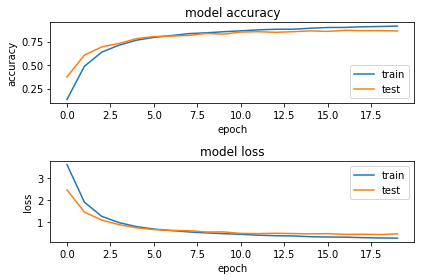

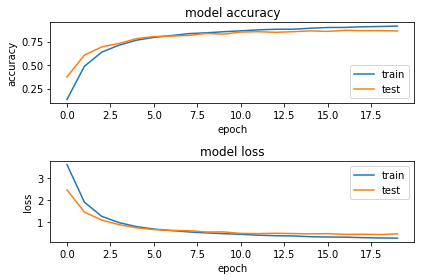

In [27]:
history = model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/home/uttam/PycharmProjects/ML"
model_name = 'cnn_model.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [28]:
prediction = model.predict_classes(X_test[1977:1978])

In [29]:
prediction

array([23])

In [30]:
scipy.misc.imsave("predict1.png",X_test[1977,:].reshape(-1,36))

/home/uttam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


# 